In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [12]:
m = 2
nx = 2
a = 0.001
rj = 0
C = np.ones(m+1)/(m+1)

def f(x,z):
    F = np.zeros(nx)
    F[0] = x[0] - x[0]*x[1]
    F[1] = -x[1]+x[1]*z
    return F

def r(x):
    return x[rj]


def ODE(t,y):
    y[nx] = C @ y[nx +1:] # this defines z - might have to be moved to the bottom
    ydot = np.zeros(m+ 2 +  nx)
    ydot[:nx] = f(y[:nx],y[nx]) # y[nx] = z
    A = get_A(m)
    B = get_B(m,a)
    ydot[nx +1:] = a * A @ y[nx+1:] + B * r(y) # Zdot = ydot[nx+1:] and Z = y[nx+1:], r(y) = r(x) = x[rj]
    return ydot

def get_B(m,a):
    B = np.zeros(m+1)
    B[0] = a
    return B

def get_A(m):
    d = -1 * np.ones(m+1)
    l = np.ones(m)
    return np.diag(d)+np.diag(l,-1)



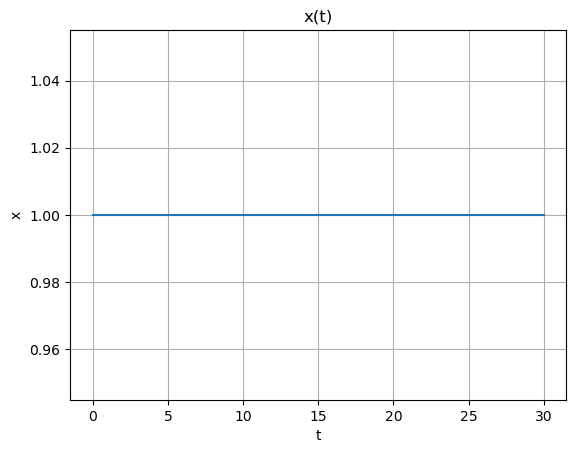

In [ ]:
y0 = np.ones(m+2 + nx) # Initial conditions
t_span = (0.0, 30.0) # Simulation window

# Solve
solution = solve_ivp(
    fun=lambda t, y: ODE(t, y),
    t_span=t_span,
    y0=y0,
    method="RK45",   # ode45 equivalent
    rtol=1e-6,
    atol=1e-6
)

T = solution.t
Y = solution.y.T

# Plot
plt.plot(T,Y[:,0]) # Change the 0 to 1 to plot x2 instead.
plt.xlabel("t")
plt.ylabel("x")
plt.title("x(t)")
plt.grid(True)